<a href="https://colab.research.google.com/github/shabnm/autoencoder/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Load the data from mnist dataset and normalize and reshape it

In [7]:
(X_train,_),(X_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [10]:
X_train.shape[:]

(60000, 28, 28)

In [8]:
X_train = X_train.astype('float32')/255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.astype('float32')/255
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [9]:
bottleneck_dim = 64
input_img = Input(shape=(np.prod(X_train.shape[1:]),))
encoded = Dense(bottleneck_dim, activation='relu')(input_img)
decoded = Dense(np.prod(X_train.shape[1:]), activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(bottleneck_dim,))


In [15]:
decoder_layer = autoencoder.layers[-1]

In [17]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

compile the autoencoder with optimizer adadelta(improved SGD and extension of adagrad)

In [18]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [22]:
autoencoder.fit(X_train,X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3479 - val_loss: 0.2678
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2578 - val_loss: 0.2442
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2335 - val_loss: 0.2205
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2128 - val_loss: 0.2029
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1978 - val_loss: 0.1903
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1867 - val_loss: 0.1806
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1780 - val_loss: 0.1728
Epoch 8/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1708 - val_loss: 0.1661
Epoch 9/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1646 - val_loss: 0.1605
Epoch

In [23]:
encoded_imgs = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_imgs)

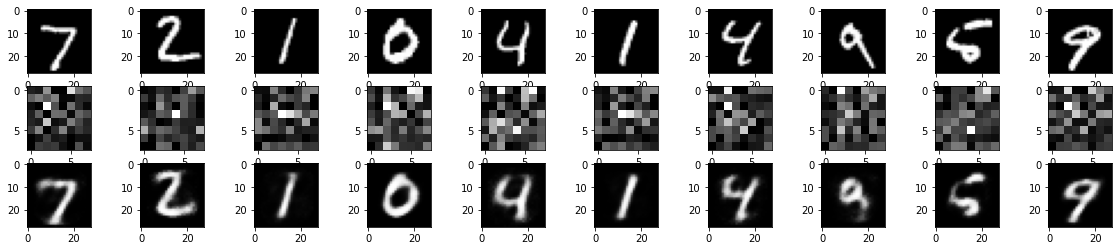

In [33]:
n =10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(3,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()

  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(encoded_imgs[i].reshape(8,8))
  plt.gray()

  ax = plt.subplot(3,n,i+1+n+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()

plt.show()


Used for data denoising and dimensionality reduction